In [2]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

原图在mmagic/data下\
输出图在mmagic/outputs下

#### 下载xformers

In [4]:
! pip install -U xformers

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
                                              0.0/97.6 MB ? eta -:--:--
                                              0.1/97.6 MB 1.7 MB/s eta 0:01:00
                                              0.2/97.6 MB 3.1 MB/s eta 0:00:32
                                              0.4/97.6 MB 4.0 MB/s eta 0:00:25
                                              0.7/97.6 MB 4.8 MB/s eta 0:00:21
                                              1.1/97.6 MB 6.4 MB/s eta 0:00:16
                                              1.5/97.6 MB 7.5 MB/s eta 0:00:13
                                              2.0/97.6 MB 7.8 MB/s eta 0:00:13
                                              2.4/97.6 MB 8.5 MB/s eta 0:00:12
     -                                        2.7/97.6 MB 8.6 MB/s eta 0:00:12
     -                                        2.9/97.6 MB 8.1 MB/s eta 0:00:12
     -                                        3.2/97.6 MB 8.0 MB/s eta 0:0

#### 载入ControlNet模型

In [3]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

06/16 15:36:04 - mmengine - INFO - Set model dtype to 'torch.float32'.
06/16 15:36:05 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


C:\Users\HKZ\mmagic\mmagic\models\archs\wrapper.py:149: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)


06/16 15:36:08 - mmengine - INFO - Enable Xformers for HuggingFace Diffusers' module 'vae'.
06/16 15:36:08 - mmengine - INFO - Enable Xformers for HuggingFace Diffusers' module 'unet'.


D:\Miniconda\Minicondaanzhuang\envs\pytorchgpu\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HKZ\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


06/16 15:44:13 - mmengine - INFO - Set model dtype to 'torch.float32'.
06/16 15:44:13 - mmengine - INFO - Enable Xformers for HuggingFace Diffusers' module 'model'.


#### 输入Canny边缘图

In [20]:
control_url = 'data/2.jpg'
control_img = mmcv.imread(control_url)
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

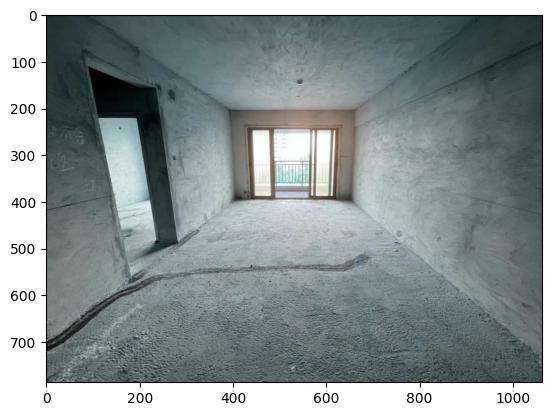

In [21]:
#显示所要改装的毛坯房原图
import matplotlib.pyplot as plt
plt.imshow(control_img)

#### 咒语Prompt

In [22]:
#欧式风格的装潢
prompt = 'Room with european style '

#### 执行预测

In [23]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'outputs/test2/sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'outputs/test2/control_{idx}.png')

C:\Users\HKZ\mmagic\mmagic\models\archs\wrapper.py:149: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  return getattr(self.model, name)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.18it/s]


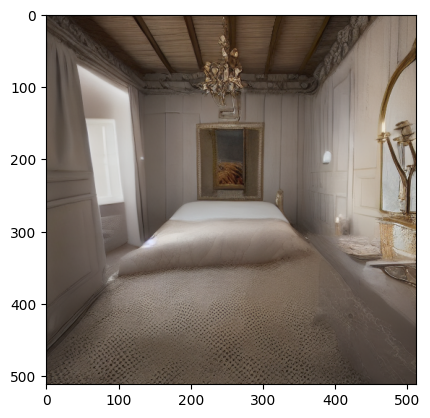

In [24]:
plt.imshow(samples[0])

In [25]:
#中式风格的装潢
prompt = 'Room with Chinese style '

In [26]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'outputs/test3/sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'outputs/test3/control_{idx}.png')

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.17it/s]


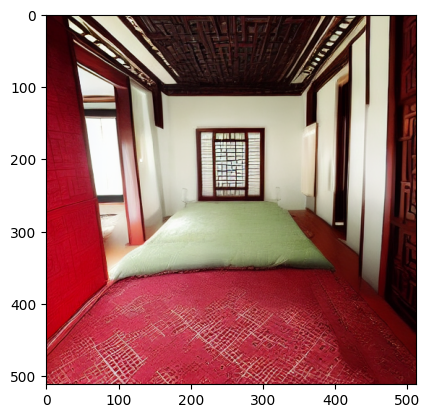

In [27]:
plt.imshow(samples[0])

In [28]:
#对自己的宿舍的图进行训练
control_url = 'data/3.jpg'
control_img = mmcv.imread(control_url)
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

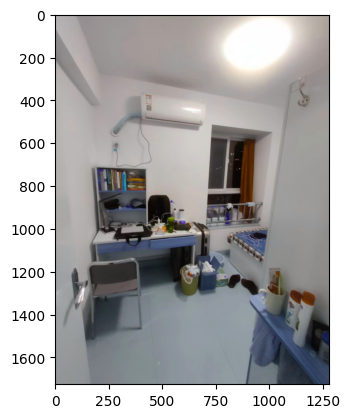

In [29]:
plt.imshow(control_img)

In [30]:
prompt = 'Room with Luxury Style '

In [31]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'outputs/test4/sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'outputs/test4/control_{idx}.png')

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.21it/s]


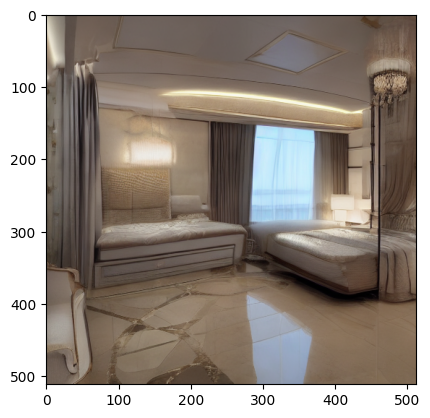

In [32]:
plt.imshow(samples[0])